# Extended Data Fig. 2 Analysing the putative NPCs in adult humans.


# Load

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import scanpy as sc

In [3]:
import pickle

In [4]:
import warnings
warnings.filterwarnings("ignore")

#from SCCAF import *
#import scvi

from glob import iglob
from tqdm import tqdm

import scanpy as sc
import pickle
from glob import iglob 
from scipy.stats import median_abs_deviation

In [5]:
from scAnnot.tools import *

In [6]:
import pandas as pd

In [7]:
import matplotlib as mpl
sc.set_figure_params(scanpy=True, fontsize=14,facecolor=None,frameon=False,transparent=True)
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.grid'] = False

In [8]:
def cluster_small_multiples(
    adata, clust_key, size=60, frameon=False, legend_loc=None, **kwargs
):
    tmp = adata.copy()

    for i, clust in enumerate(adata.obs[clust_key].cat.categories):
        tmp.obs[clust] = adata.obs[clust_key].isin([clust]).astype("category")
        try:
            tmp.uns[clust + "_colors"] = ["#d3d3d3", adata.uns[clust_key + "_colors"][i]]
        except:
            pass

    sc.pl.umap(
        tmp,
        groups=tmp.obs[clust].cat.categories[1:].values,
        color= adata.obs[clust_key].cat.categories.tolist(),
        size=size,
        frameon=frameon,
        legend_loc=legend_loc,
        **kwargs,
    )

In [9]:
def msample(x, n, frac):
    """
    sample the matrix by number or by fraction.
    if the fraction is larger than the sample number, use number for sampling. Otherwise, use fraction.
    Input
    -----
    x: the matrix to be split
    n: number of vectors to be sampled
    frac: fraction of the total matrix to be sampled
    return
    -----
    sampled selection.
    """
    if len(x) <= np.floor(n / frac):
        if len(x) < 10: frac = 0.9
        return x.sample(frac=frac)
    else:
        return x.sample(n=n)

## Readin

In [ ]:
ad=sc.read('data/results/hm3f1a_hip_integration_palantir.h5ad')

In [27]:
label={
'Glutamatergic neurons':'Glutamatergic', 
'Mature neurons':'Glutamatergic', 
'Astrocytes':'Astrocyte', 
'Radial glial cells':'Astrocyte', 
'Neuroblasts':'Neuroblast', 
'Immature neurons':'Immature Glutamatergic', 
'Neural Progenitor cells':'Neural progenitor'
}

# a

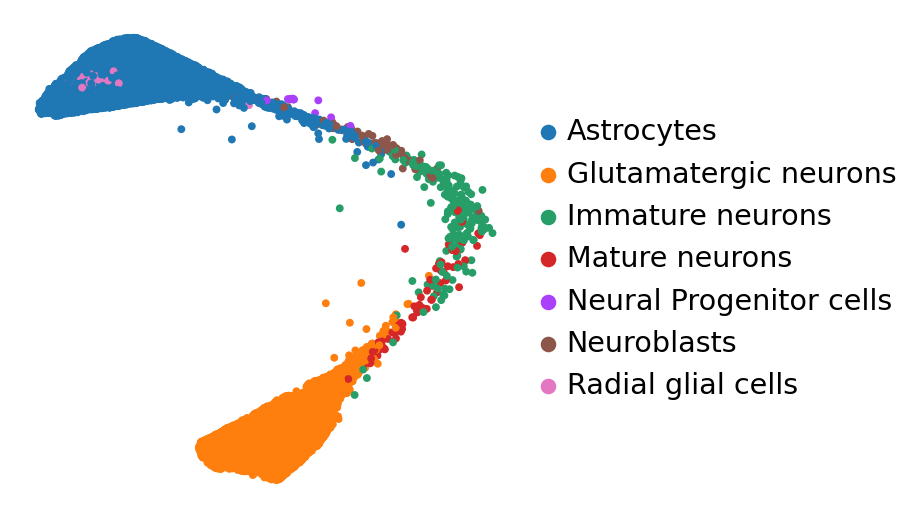

In [22]:
figsize(4,4)
sc.pl.draw_graph(ad[ad.obs.group=='Franjic2021'], color=['louvain2'], frameon=False,size=50,title='',save='sfig4_umap_1.pdf')

# b

In [17]:
ad.uns['iroot'] = np.flatnonzero(ad.obs['louvain2'] == 'Neural Progenitor cells')[0]

In [18]:
ad.obs['dpt_pseudotime_old']=ad.obs.dpt_pseudotime

In [19]:
sc.tl.dpt(ad)

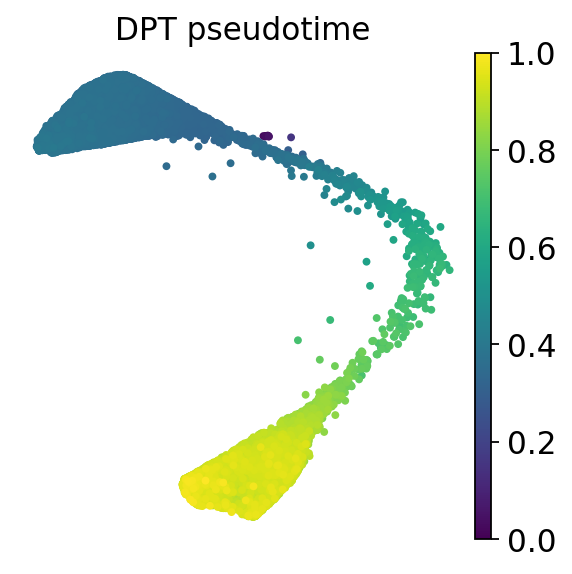

In [21]:
figsize(4,4)
sc.pl.draw_graph(ad, color=['dpt_pseudotime'], legend_loc='on data',frameon=False,size=50,title='DPT pseudotime',save='sfig4b_umap1.pdf')

# c

# d

In [293]:
import matplotlib as mpl
sc.set_figure_params(scanpy=True, fontsize=14,facecolor=None,frameon=False,transparent=True)
mpl.rcParams['axes.spines.top'] = True
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.grid'] = False

In [34]:
ad1=sc.AnnData(X=ad.X.copy(),obs=ad.obs.copy(),var=ad.var.copy())

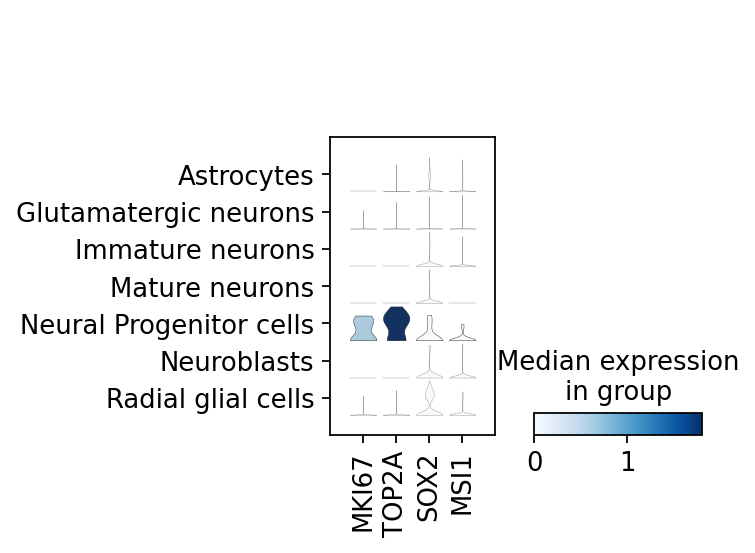

In [144]:
figsize(4,4)
sc.pl.stacked_violin(ad1[ad1.obs.group=='Franjic2021'], ['MKI67','TOP2A','SOX2','MSI1'], groupby='louvain2',save='sfig4_violin_1.pdf')#,swap_axes=True)

# h

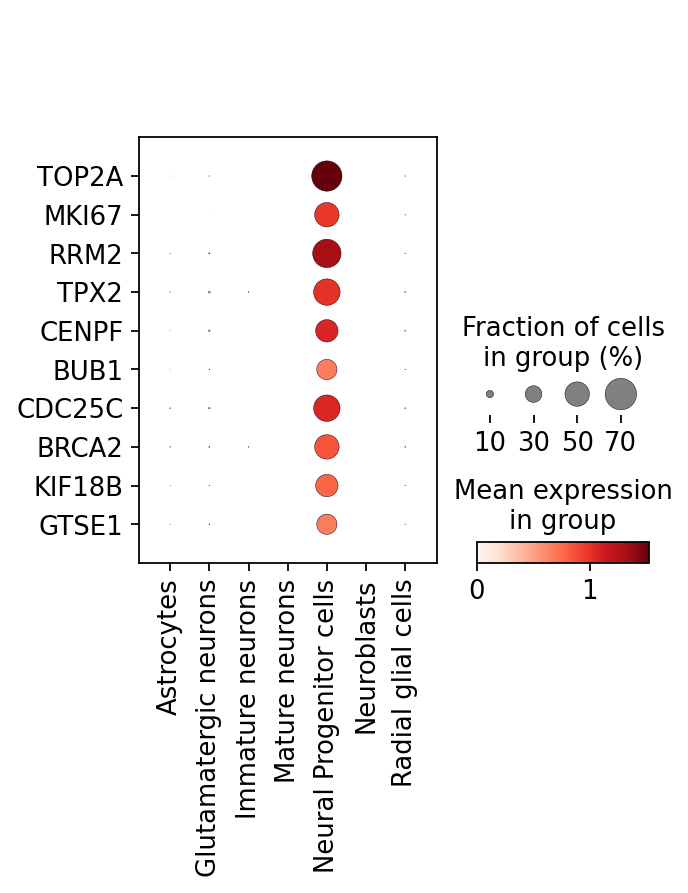

In [145]:
figsize(4,4)
sc.pl.dotplot(ad1[ad1.obs.group=='Franjic2021'], deg.gene[:10], groupby='louvain2',save='sfig4_dotplot_1.pdf',swap_axes=True)

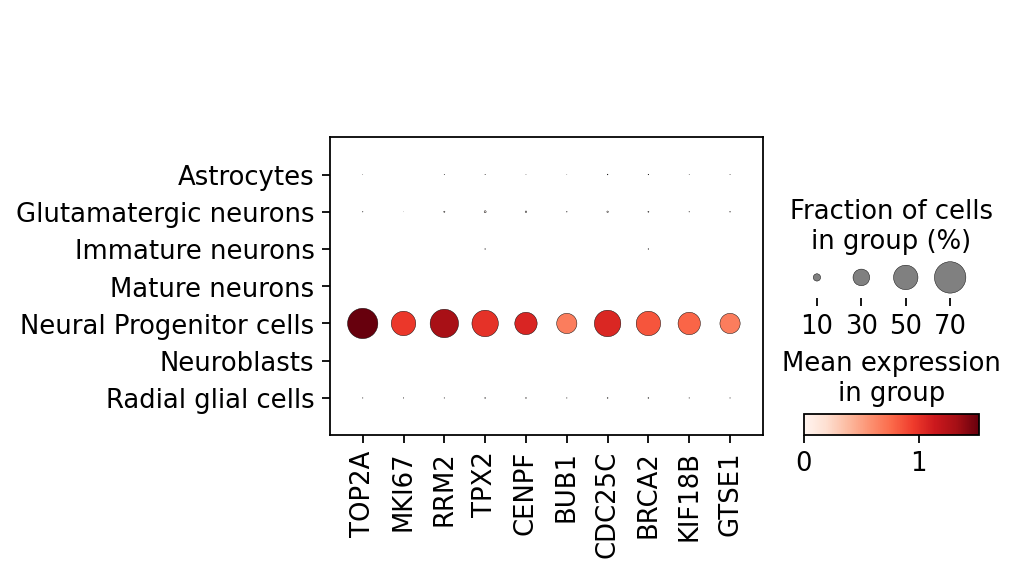

In [302]:
figsize(6,4)
sc.pl.dotplot(ad1[ad1.obs.group=='Franjic2021'], deg.gene[:10], groupby='louvain2',save='sfig4_dotplot_2.pdf')

In [303]:
import matplotlib as mpl
sc.set_figure_params(scanpy=True, fontsize=14,facecolor=None,frameon=False,transparent=True)
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.grid'] = False

Text(0.5, 1.0, 'MKI67')

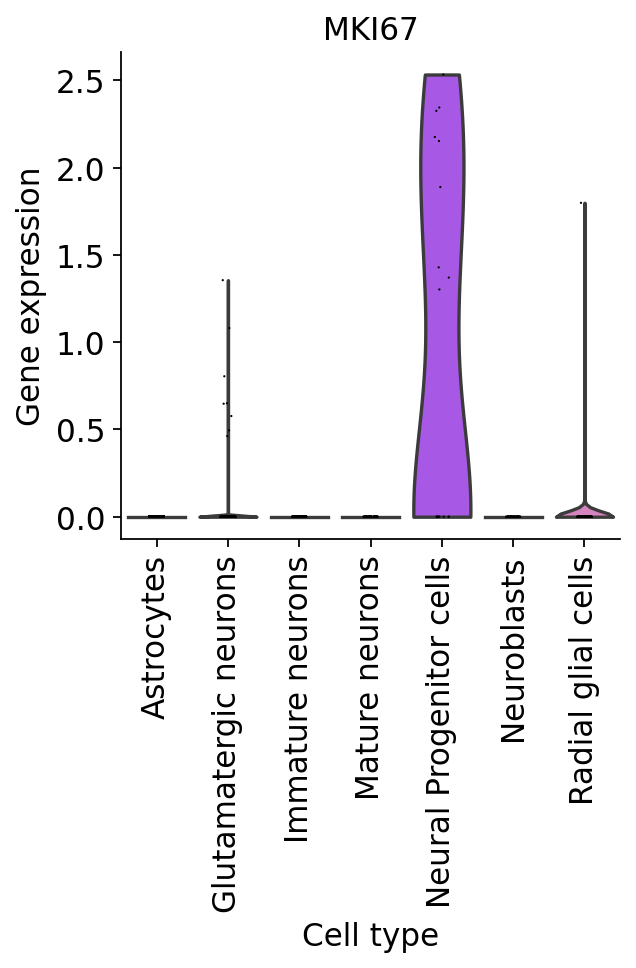

In [54]:
fig, ax = plt.subplots()
sc.pl.violin(ad1[ad1.obs.group=='Franjic2021'], ['MKI67'], groupby='louvain2',rotation=90,xlabel='Cell type',ylabel='Gene expression',ax=ax,show=False)
ax.set_title('MKI67')

In [ ]:
/home/chen_xinyue/BrainAtlas/neurogenesis_brain/GO_Pathway/Tables/S3_markers.csv

In [56]:
deg=pd.read_csv("/home/chen_xinyue/BrainAtlas/neurogenesis_brain/GO_Pathway/Tables/S3_markers.csv",index_col=0)

In [57]:
deg

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
TOP2A,5.614804e-141,3.282579,0.857,0.002,5.830413e-137
MKI67,4.043873e-137,2.498150,0.714,0.000,4.199158e-133
CDC25C,7.312809e-125,2.552489,0.714,0.001,7.593621e-121
BRCA2,1.609018e-124,2.033387,0.714,0.001,1.670804e-120
KIF18B,6.638897e-111,2.042323,0.643,0.001,6.893831e-107
...,...,...,...,...,...
MAU2,9.992938e-01,-0.414359,0.143,0.139,1.000000e+00
EMC3,9.992963e-01,-0.411986,0.143,0.141,1.000000e+00
ARHGEF11,9.994532e-01,-0.294719,0.286,0.266,1.000000e+00
BRAF,9.995360e-01,-0.453294,0.571,0.455,1.000000e+00


In [59]:
deg['gene']=list(deg.index)

In [62]:
import seaborn as sns

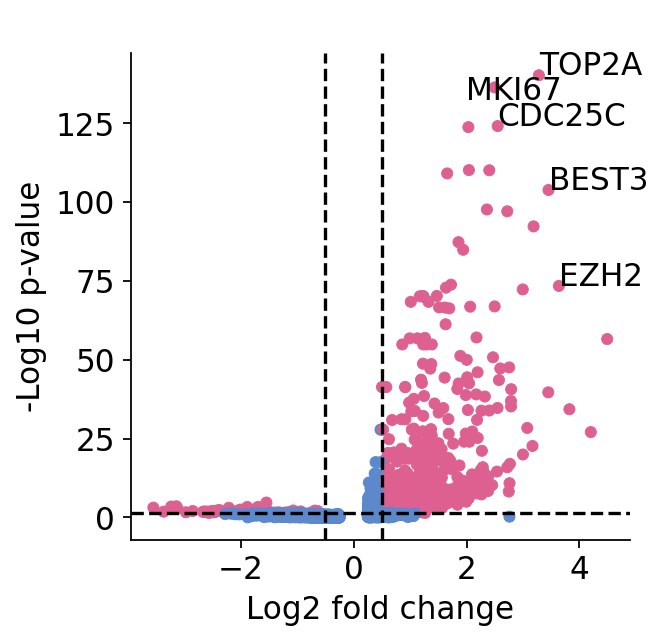

In [107]:
figsize(4,4)
np.random.seed(0)
enhanced_volcano(deg,lab = 'gene',
    selectLab = ['TOP2A','MKI67','CDC25C','BEST3','EZH2'],
    x = 'avg_log2FC',
    y = 'p_val',FCcutoff =0.5,colors={"sig": "#DD6091", "not sig": "#5C89CC"},pointSize=25)
plt.savefig('figures/sfig4_DEGs.pdf',dpi=300, bbox_inches='tight',transparent=True)

In [109]:
deg=pd.read_csv("data/hipngs/hm3f1a_Franjic_npc_DEG.csv",index_col=0)

In [110]:
deg

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
TOP2A,8.167411e-130,2.986527,0.65,0.001,8.481040e-126
MKI67,1.474533e-107,2.089066,0.50,0.000,1.531155e-103
RRM2,3.249006e-100,2.532023,0.55,0.002,3.373767e-96
TPX2,8.704927e-93,2.005857,0.55,0.003,9.039196e-89
CENPF,2.867530e-87,2.743667,0.45,0.001,2.977643e-83
...,...,...,...,...,...
BRD8,9.993833e-01,-0.156855,0.10,0.098,1.000000e+00
UBE2G2,9.995342e-01,-0.242277,0.20,0.188,1.000000e+00
SAT1,1.000000e+00,-0.661523,0.15,0.138,1.000000e+00
MTIF3,1.000000e+00,-0.266300,0.10,0.097,1.000000e+00


In [111]:
deg['gene']=list(deg.index)

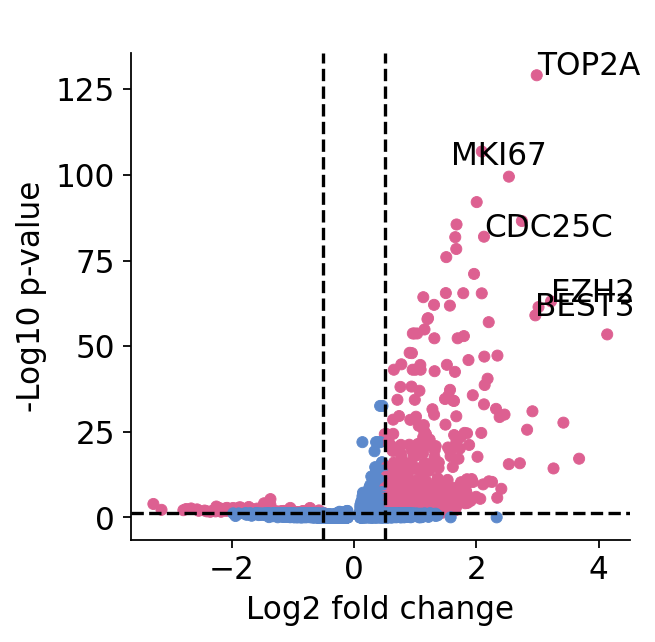

In [112]:
figsize(4,4)
np.random.seed(0)
enhanced_volcano(deg,lab = 'gene',
    selectLab = ['TOP2A','MKI67','CDC25C','BEST3','EZH2'],
    x = 'avg_log2FC',
    y = 'p_val',FCcutoff =0.5,colors={"sig": "#DD6091", "not sig": "#5C89CC"},pointSize=25)
plt.savefig('figures/sfig4_DEGs1.pdf',dpi=300, bbox_inches='tight',transparent=True)

In [115]:
list(deg.gene[:20])

['TOP2A',
 'MKI67',
 'RRM2',
 'TPX2',
 'CENPF',
 'BUB1',
 'CDC25C',
 'BRCA2',
 'KIF18B',
 'GTSE1',
 'NCAPG',
 'PBK',
 'FBXO5',
 'ASPM',
 'AURKB',
 'EZH2',
 'CKAP2L',
 'DTL',
 'SMC4',
 'BEST3']

In [118]:
top_10_proliferation_genes = [
    'MKI67',  # Marker of Proliferation Ki-67
    'TOP2A',  # DNA Topoisomerase II Alpha
    'RRM2',   # Ribonucleotide Reductase Regulatory Subunit M2
    'CENPF',  # Centromere Protein F
    'BUB1',   # BUB1 Mitotic Checkpoint Serine/Threonine Kinase
    'CDC25C', # Cell Division Cycle 25C
    'AURKB',  # Aurora Kinase B
    #'TPX2',   # Targeting Protein For Xklp2
    #'KIF18B', # Kinesin Family Member 18B
    #'GTSE1'   # G2 And S Phase Expressed 1
]

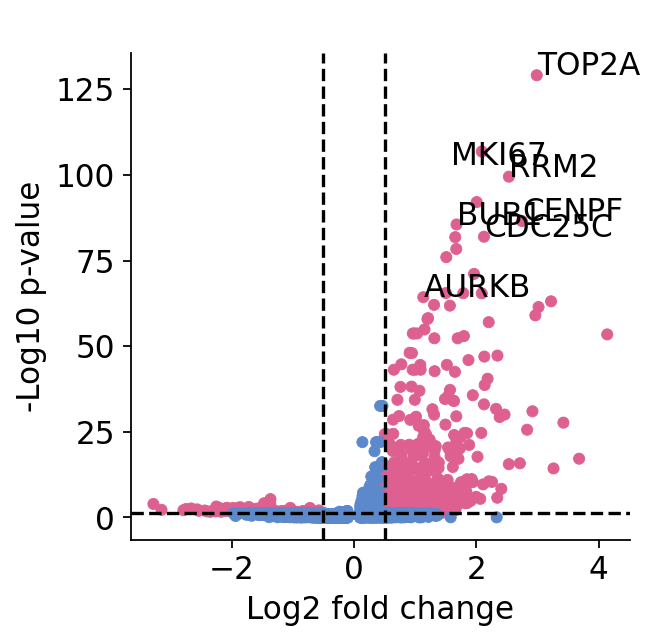

In [119]:
figsize(4,4)
np.random.seed(0)
enhanced_volcano(deg,lab = 'gene',
    selectLab = top_10_proliferation_genes,
    x = 'avg_log2FC',
    y = 'p_val',FCcutoff =0.5,colors={"sig": "#DD6091", "not sig": "#5C89CC"},pointSize=25)
plt.savefig('figures/sfig4_DEGs1.pdf',dpi=300, bbox_inches='tight',transparent=True)

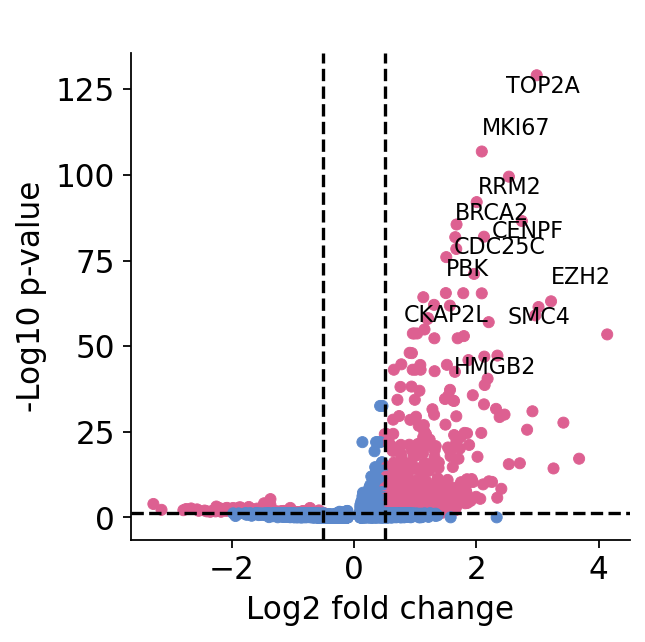

In [148]:
figsize(4,4)
np.random.seed(0)
enhanced_volcano(deg,lab = 'gene',
    selectLab = ['TOP2A',
 'MKI67','RRM2','BRCA2', 'CENPF','CDC25C','PBK','EZH2','CKAP2L',
  'SMC4','HMGB2'],

    x = 'avg_log2FC',
    y = 'p_val',FCcutoff =0.5,colors={"sig": "#DD6091", "not sig": "#5C89CC"},pointSize=25)
plt.savefig('figures/sfig4_DEGs1.pdf',dpi=300, bbox_inches='tight',transparent=True)

# g

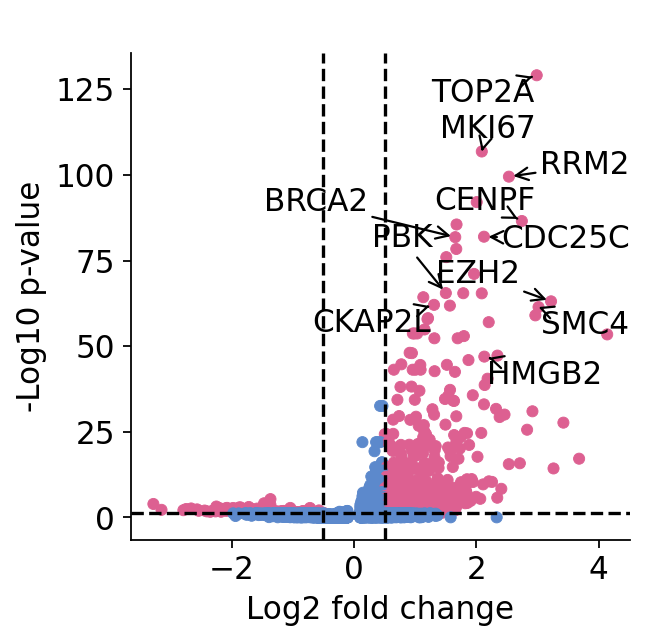

In [159]:
figsize(4,4)
np.random.seed(0)
enhanced_volcano(deg,lab = 'gene',
    selectLab = ['TOP2A',
 'MKI67','RRM2','BRCA2', 'CENPF','CDC25C','PBK','EZH2','CKAP2L',
  'SMC4','HMGB2'],

    x = 'avg_log2FC',
    y = 'p_val',FCcutoff =0.5,colors={"sig": "#DD6091", "not sig": "#5C89CC"},pointSize=25)
plt.savefig('figures/sfig4_DEGs1.pdf',dpi=300, bbox_inches='tight',transparent=True)

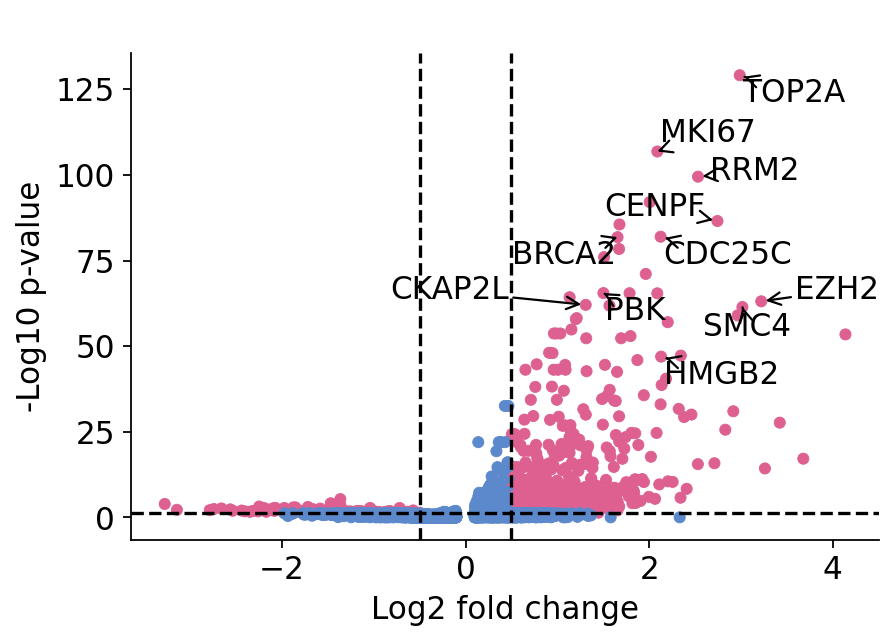

In [305]:
figsize(6,4)
np.random.seed(0)
enhanced_volcano(deg,lab = 'gene',
    selectLab = ['TOP2A',
 'MKI67','RRM2','BRCA2', 'CENPF','CDC25C','PBK','EZH2','CKAP2L',
  'SMC4','HMGB2'],

    x = 'avg_log2FC',
    y = 'p_val',FCcutoff =0.5,colors={"sig": "#DD6091", "not sig": "#5C89CC"},pointSize=25)
plt.savefig('figures/sfig4_DEGs2.pdf',dpi=300, bbox_inches='tight',transparent=True)

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from adjustText import adjust_text

def enhanced_volcano(toptable, x, y, lab, pCutoff = 0.05, FCcutoff = 1, pointSize = 5, 
                     colors = {"sig": "red", "not sig": "blue"}, selectLab = None, xlim = None):
    assert pd.api.types.is_numeric_dtype(toptable[x]), f"{x} is not numeric!"
    assert pd.api.types.is_numeric_dtype(toptable[y]), f"{y} is not numeric!"

    toptable = toptable.copy()
    toptable['Significance'] = np.where((abs(toptable[x]) > FCcutoff) & (toptable[y] < pCutoff), 'sig', 'not sig')
    toptable['-log10(p-value)'] = -np.log10(toptable[y])
    toptable.loc[toptable[y] == 0, y] = 1e-10

    # Create the scatterplot
    sns.scatterplot(data=toptable, x=x, y='-log10(p-value)', hue='Significance', palette=colors, s=pointSize, edgecolor=None)

    # Draw a vertical line at FCcutoff
    plt.axvline(x=FCcutoff, color='black', linestyle='--')
    plt.axvline(x=-FCcutoff, color='black', linestyle='--')

    # Draw a horizontal line at pCutoff
    plt.axhline(y=-np.log10(pCutoff), color='black', linestyle='--')

    texts = []
    if selectLab is not None:
        for i in range(toptable.shape[0]):
            if toptable[lab].iloc[i] in selectLab:
                # Only annotate points that are significant
                if toptable['Significance'].iloc[i] == 'sig':
                    texts.append(plt.text(toptable[x].iloc[i], toptable['-log10(p-value)'].iloc[i], toptable[lab].iloc[i]))

    # Optimize text placement to minimize overlaps
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'), ax=plt.gca())
    #adjust_text(texts, ax=plt.gca())

    # Set x-axis limits
    if xlim is not None:
        plt.xlim(xlim)
        
    # Add title and labels
    plt.title(' ')
    plt.xlabel('Log2 fold change')
    plt.ylabel('-Log10 p-value')

    # Remove the legend
    plt.legend().remove()

# i

In [37]:
import venn

In [38]:
dfs=[pd.read_csv(f"data/hipngs/{i}",index_col=0) for i in ['hm3f1a_Franjic_npc_DEG.csv','hm3f1a_Zhong_npc_DEG.csv','hm3f1a_Bhaduri_npc_DEG.csv','hm3f1a_Braun_npc_DEG.csv']]

In [39]:
dfs[0]

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
TOP2A,8.167411e-130,2.986527,0.65,0.001,8.481040e-126
MKI67,1.474533e-107,2.089066,0.50,0.000,1.531155e-103
RRM2,3.249006e-100,2.532023,0.55,0.002,3.373767e-96
TPX2,8.704927e-93,2.005857,0.55,0.003,9.039196e-89
CENPF,2.867530e-87,2.743667,0.45,0.001,2.977643e-83
...,...,...,...,...,...
BRD8,9.993833e-01,-0.156855,0.10,0.098,1.000000e+00
UBE2G2,9.995342e-01,-0.242277,0.20,0.188,1.000000e+00
SAT1,1.000000e+00,-0.661523,0.15,0.138,1.000000e+00
MTIF3,1.000000e+00,-0.266300,0.10,0.097,1.000000e+00


In [ ]:
"#DD6091"

In [40]:
# Your list of hexadecimal color values
hex_colors = ['#DD6091', '#FFB6C1', '#D9C566', '#FF8011', '#9440F3', '#E30B5C', '#AFE1AF', '#53D385', '#006091', '#74caff', '#5C89CC']

# Function to convert hex to RGB
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')  # Remove the '#' if it exists
    lv = len(hex_color)
    return [int(hex_color[i:i + lv // 3], 16)/255 for i in range(0, lv, lv // 3)]+[0.5]

# Convert the list of hex colors to a list of RGB tuples
rgb_colors = [hex_to_rgb(color) for color in hex_colors]

# Print the list of RGB tuples
print(rgb_colors)

[[0.8666666666666667, 0.3764705882352941, 0.5686274509803921, 0.5], [1.0, 0.7137254901960784, 0.7568627450980392, 0.5], [0.8509803921568627, 0.7725490196078432, 0.4, 0.5], [1.0, 0.5019607843137255, 0.06666666666666667, 0.5], [0.5803921568627451, 0.25098039215686274, 0.9529411764705882, 0.5], [0.8901960784313725, 0.043137254901960784, 0.3607843137254902, 0.5], [0.6862745098039216, 0.8823529411764706, 0.6862745098039216, 0.5], [0.3254901960784314, 0.8274509803921568, 0.5215686274509804, 0.5], [0.0, 0.3764705882352941, 0.5686274509803921, 0.5], [0.4549019607843137, 0.792156862745098, 1.0, 0.5], [0.3607843137254902, 0.5372549019607843, 0.8, 0.5]]


Text(0.7, 0.76, 'Fetal')

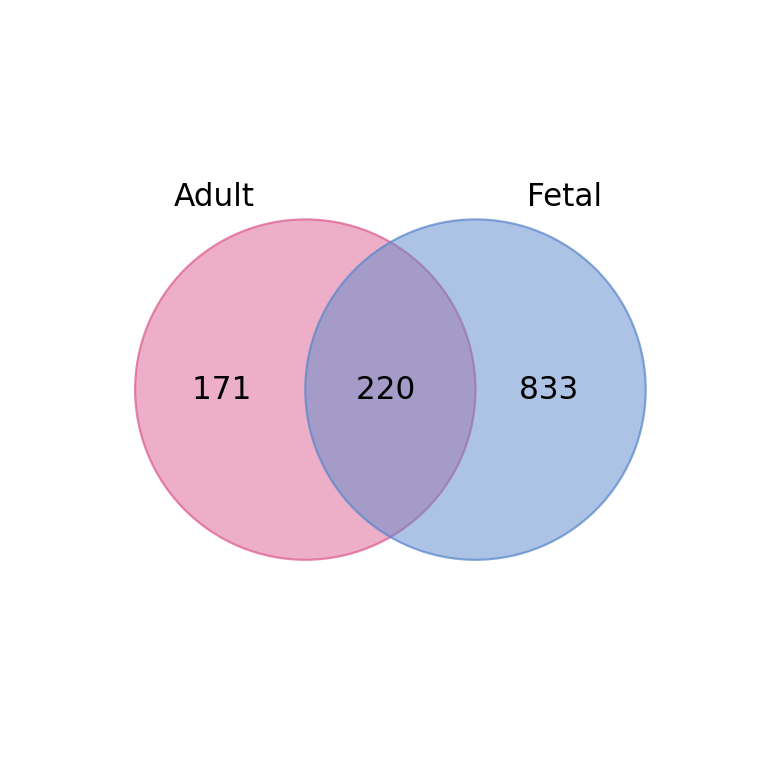

In [56]:
figsize(4,4)
names=['Adult', 'Fetal']
colors=rgb_colors[:4]
labels = venn.get_labels([set(i.index[(i.p_val_adj<0.05) & (np.abs(i.avg_log2FC)>0.25)]) for i in dfs[:2]], fill=['number'])
fig, ax = venn.venn2(labels, names=['A','B'],colors=[rgb_colors[i] for i in [0,-1]],figsize=(6,8))
ax.get_legend().remove()
#ax.text(0.13, 0.18, names[0],  fontsize=14, ha="right")
ax.text(0.3, 0.76, names[0],  fontsize=14, ha="right", va="bottom")
ax.text(0.7, 0.76, names[1],  fontsize=14, ha="left", va="bottom")
#ax.text(0.87, 0.3, names[3],  fontsize=14, ha="left", va="top")
#plt.savefig('figures/sfig4_venn.pdf',dpi=300, bbox_inches='tight',transparent=True)

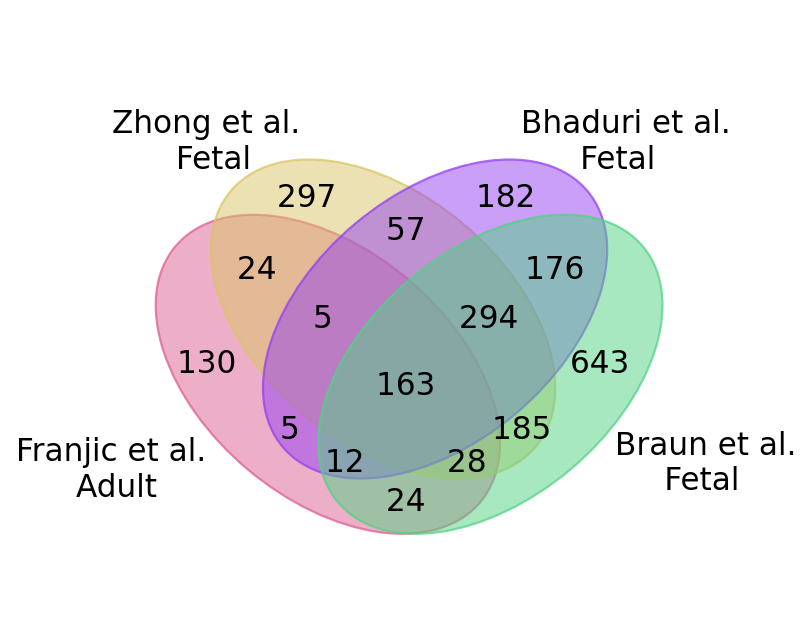

In [219]:
figsize(5,5)
names=['Franjic et al.\nAdult     ', 'Zhong et al.\nFetal     ', 'Bhaduri et al.\n      Fetal', 'Braun et al.\n     Fetal']
colors=rgb_colors[:4]
labels = venn.get_labels([set(i.index[(i.p_val_adj<0.05) & (np.abs(i.avg_log2FC)>0.25)]) for i in dfs], fill=['number'])
fig, ax = venn.venn4(labels, names=['A','B','C','D'],colors=[rgb_colors[i] for i in [0,2,4,7]],figsize=(5,5))
ax.get_legend().remove()
ax.text(0.13, 0.18, names[0],  fontsize=14, ha="right")
ax.text(0.3, 0.76, names[1],  fontsize=14, ha="right", va="bottom")
ax.text(0.7, 0.76, names[2],  fontsize=14, ha="left", va="bottom")
ax.text(0.87, 0.3, names[3],  fontsize=14, ha="left", va="top")
plt.savefig('figures/sfig4_venn1.pdf',dpi=300, bbox_inches='tight',transparent=True)

# j

In [57]:
go=pd.read_csv('data/hipngs/hm3f1a_Franjic_npc_DEG_GOs_top.csv',index_col=0)

In [58]:
study={'Franjic2021':'Franjic et al.\nAdult', 
       'Zhong2020':'Zhong et al.\nFetal', 
       'Braun2022': 'Braun et al.\nFetal', 
       'Bhaduri2020': 'Bhaduri et al.\nFetal'
      }
go['study']=go['Celltype'].replace(study)

In [59]:
go

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count,Celltype,logq,study
Bhaduri2020.GO:0007059,GO:0007059,chromosome segregation,90/858,334/18866,1.022342e-44,5.132159e-41,4.161471e-41,51203/83540/4288/7153/11065/1063/332/4085/9212...,90,Bhaduri2020,40.380753,Bhaduri et al.\nFetal
Zhong2020.GO:0007059,GO:0007059,chromosome segregation,95/1002,334/18866,1.501617e-43,7.623711e-40,6.411116e-40,7153/4288/51203/332/11065/4085/10460/9055/1063...,95,Zhong2020,39.193066,Zhong et al.\nFetal
Bhaduri2020.GO:0140014,GO:0140014,mitotic nuclear division,81/858,286/18866,4.718081e-42,1.184238e-38,9.602536e-39,51203/83540/4288/22974/11065/1063/332/4085/921...,81,Bhaduri2020,38.017614,Bhaduri et al.\nFetal
Zhong2020.GO:0000280,GO:0000280,nuclear division,104/1002,428/18866,9.357443e-41,2.375387e-37,1.997568e-37,7153/4288/51203/332/11065/4085/10460/9055/1063...,104,Zhong2020,36.699498,Zhong et al.\nFetal
Zhong2020.GO:0006260,GO:0006260,DNA replication,83/1002,273/18866,1.550541e-40,2.624032e-37,2.206664e-37,6241/890/157570/51053/23594/26271/63967/6119/6...,83,Zhong2020,36.656264,Zhong et al.\nFetal
...,...,...,...,...,...,...,...,...,...,...,...,...
Bhaduri2020.GO:0033260,GO:0033260,nuclear DNA replication,24/858,60/18866,3.396831e-17,4.736693e-15,3.840803e-15,675/51053/10926/79915/8318/5111/11200/4176/598...,24,Bhaduri2020,14.415578,Bhaduri et al.\nFetal
Franjic2021.GO:0033260,GO:0033260,nuclear DNA replication,18/370,60/18866,5.333105e-17,7.279688e-15,6.190288e-15,675/8318/5111/51053/5427/3978/81620/4171/79915...,18,Franjic2021,14.208289,Franjic et al.\nAdult
Franjic2021.GO:0071103,GO:0071103,DNA conformation change,37/370,355/18866,9.810643e-17,1.243499e-14,1.057410e-14,7153/64151/10051/79682/23397/64105/3148/55355/...,37,Franjic2021,13.975756,Franjic et al.\nAdult
Franjic2021.GO:0044839,GO:0044839,cell cycle G2/M phase transition,32/370,273/18866,4.399911e-16,4.879776e-14,4.149521e-14,22974/1063/995/51512/26271/9212/51514/9928/316...,32,Franjic2021,13.382002,Franjic et al.\nAdult


In [60]:
go.columns

Index(['ID', 'Description', 'GeneRatio', 'BgRatio', 'pvalue', 'p.adjust',
       'qvalue', 'geneID', 'Count', 'Celltype', 'logq', 'study'],
      dtype='object')

In [62]:
df=go[['Description','study','logq']].pivot(index='Description', columns='study', values='logq')

In [63]:
df=df.loc[pd.unique(go.Description),['Franjic et al.\nAdult', 'Zhong et al.\nFetal', 'Braun et al.\nFetal', 'Bhaduri et al.\nFetal']]

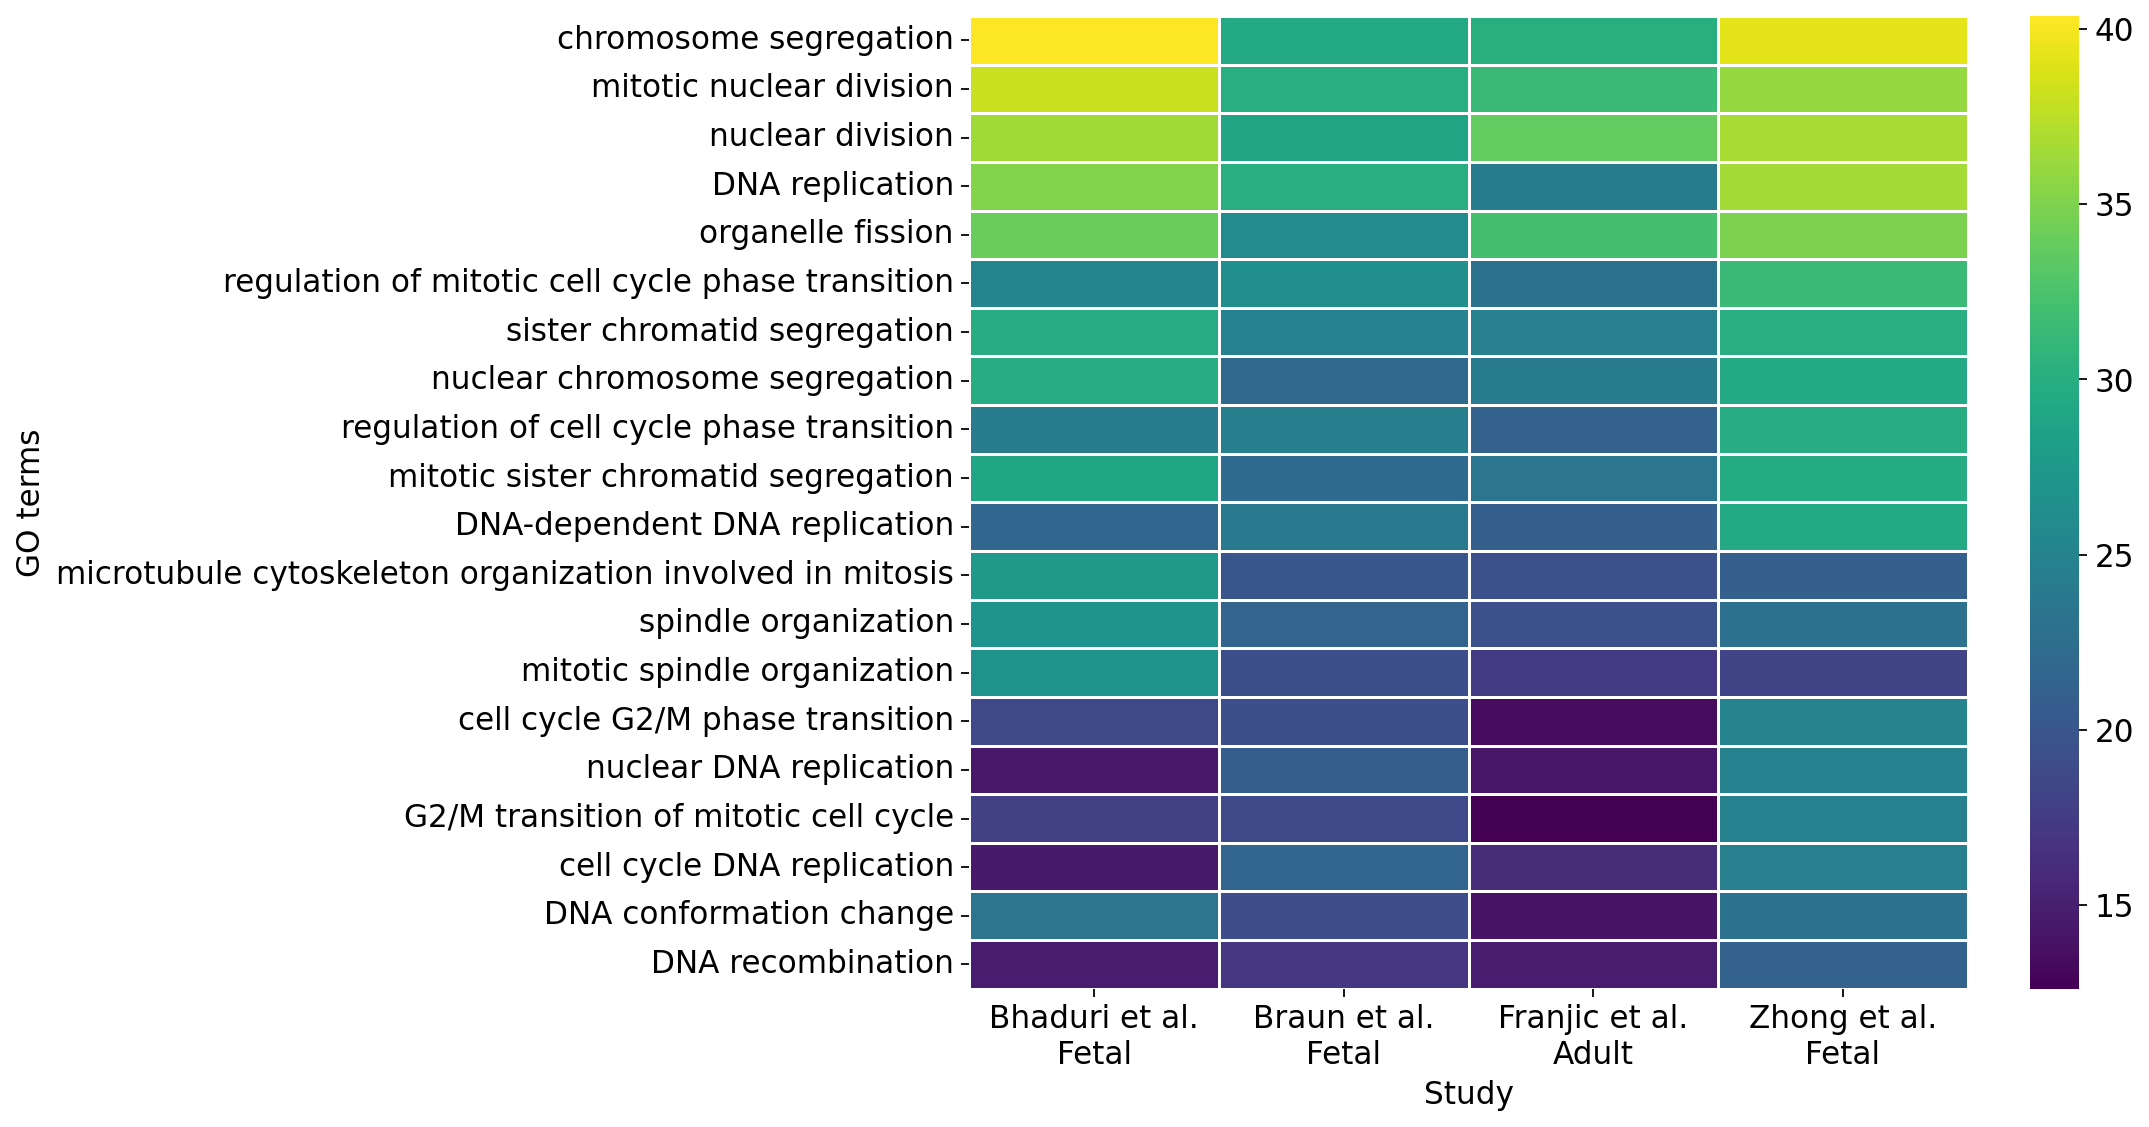

In [256]:
# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))  # Adjust the size as necessary
sns.heatmap(df, annot=False, linewidths=.5, cmap='viridis')

# Adding labels
plt.xlabel('Study')
plt.ylabel('GO terms')

# Show the plot
plt.show()

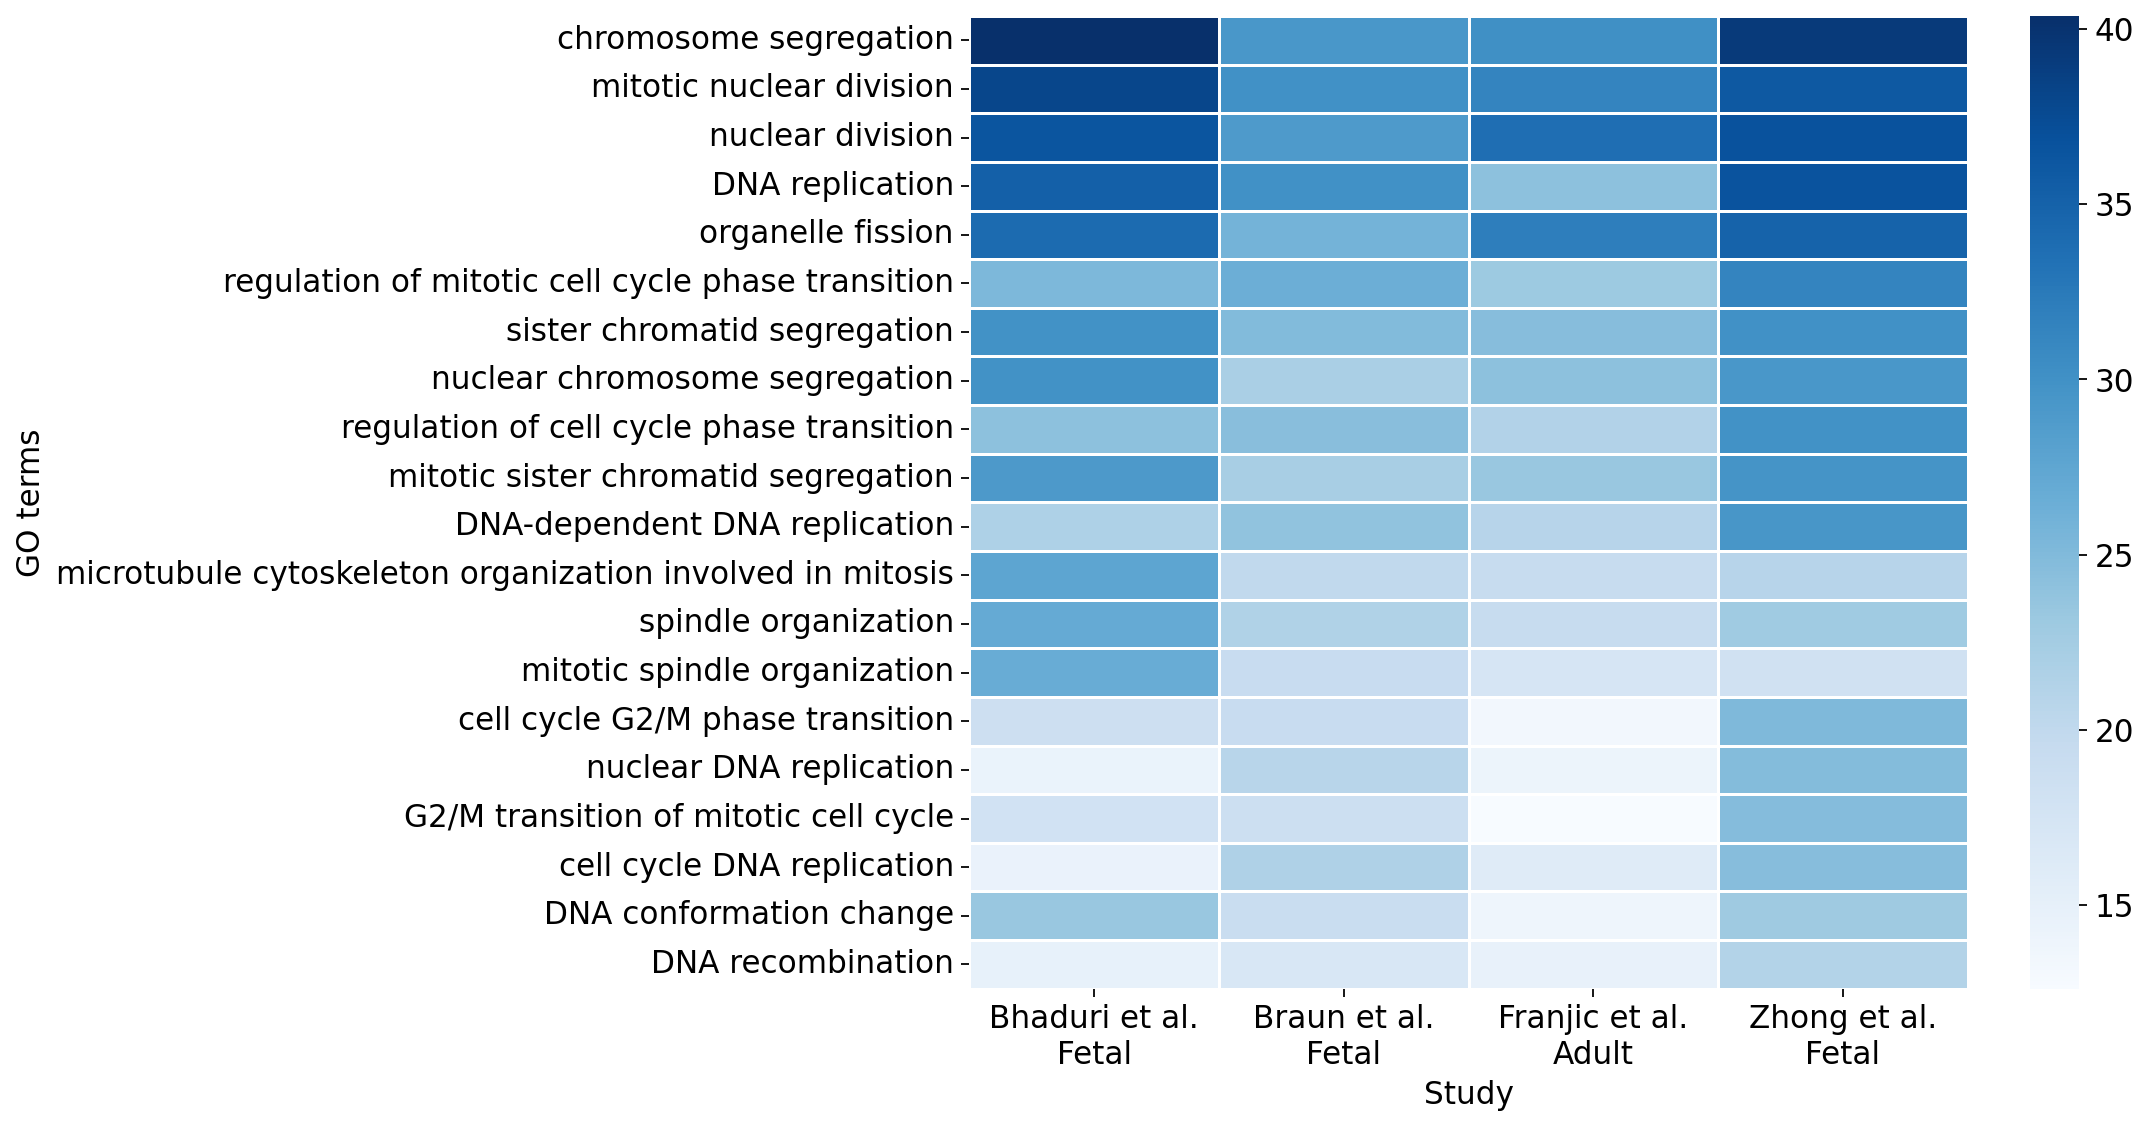

In [257]:
# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))  # Adjust the size as necessary
sns.heatmap(df, annot=False, linewidths=.5,cmap='Blues')

# Adding labels
plt.xlabel('Study')
plt.ylabel('GO terms')

# Show the plot
plt.show()

In [274]:
list(df.index)

['chromosome segregation',
 'mitotic nuclear division',
 'nuclear division',
 'DNA replication',
 'organelle fission',
 'regulation of mitotic cell cycle phase transition',
 'sister chromatid segregation',
 'nuclear chromosome segregation',
 'regulation of cell cycle phase transition',
 'mitotic sister chromatid segregation',
 'DNA-dependent DNA replication',
 'microtubule cytoskeleton organization involved in mitosis',
 'spindle organization',
 'mitotic spindle organization',
 'cell cycle G2/M phase transition',
 'nuclear DNA replication',
 'G2/M transition of mitotic cell cycle',
 'cell cycle DNA replication',
 'DNA conformation change',
 'DNA recombination']

In [64]:
df.index=['chromosome segregation',
 'mitotic nuclear division',
 'nuclear division',
 'DNA replication',
 'organelle fission',
 'regulation of mitotic \ncell cycle phase transition',
 'sister chromatid segregation',
 'nuclear chromosome segregation',
 'regulation of cell cycle \nphase transition',
 'mitotic sister \nchromatid segregation',
 'DNA-dependent DNA replication',
 'microtubule cytoskeleton \norganization involved in mitosis',
 'spindle organization',
 'mitotic spindle organization',
 'cell cycle G2/M phase transition',
 'nuclear DNA replication',
 'G2/M transition of \nmitotic cell cycle',
 'cell cycle DNA replication',
 'DNA conformation change',
 'DNA recombination']

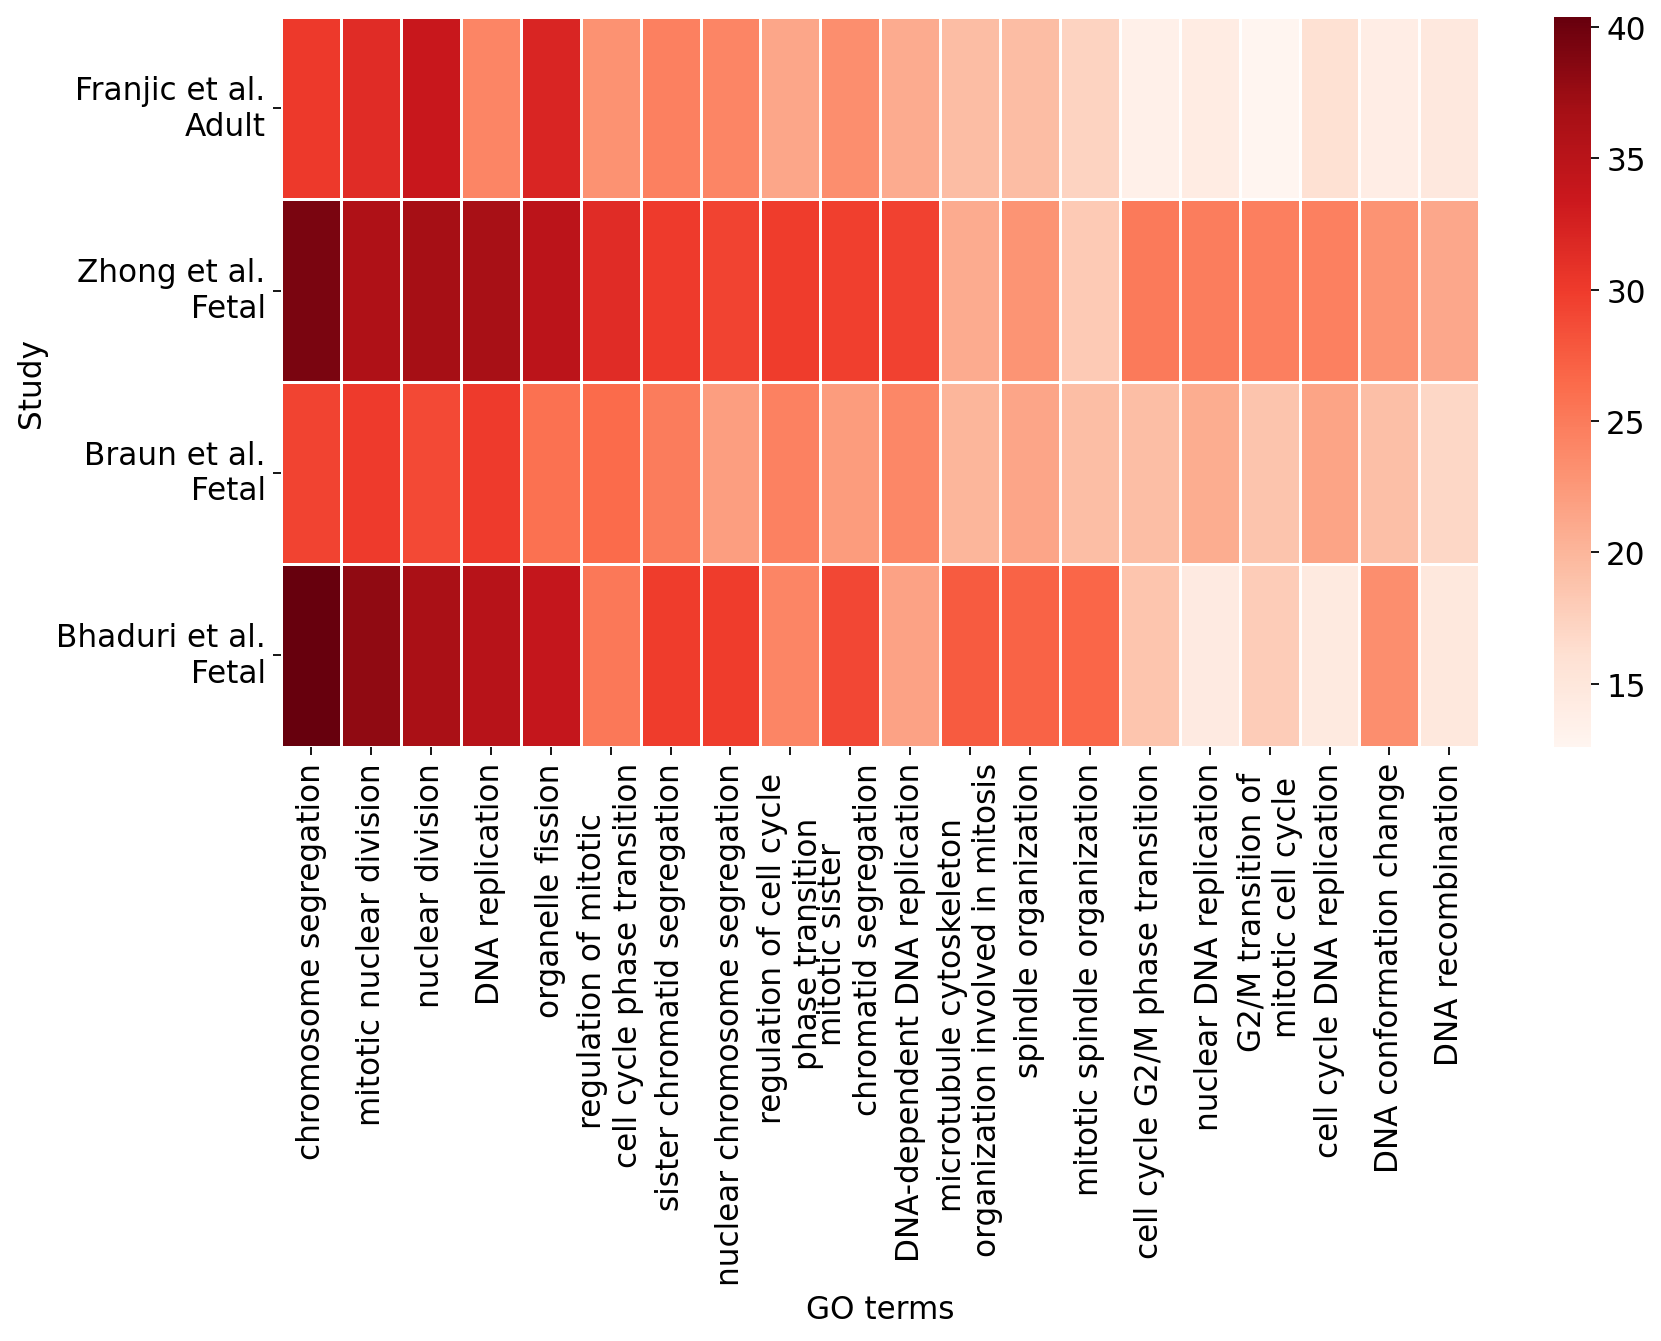

In [299]:
figsize(12,6)
sns.heatmap(df.T, annot=False, linewidths=.5,cmap='Reds')

# Adding labels
plt.ylabel('Study')
plt.xlabel('GO terms')

# Show the plot
plt.show()

In [67]:
df=df[['Franjic et al.\nAdult', 'Zhong et al.\nFetal']]

In [68]:
df.columns=['Adult', 'Fetal']

In [70]:
import seaborn as sns

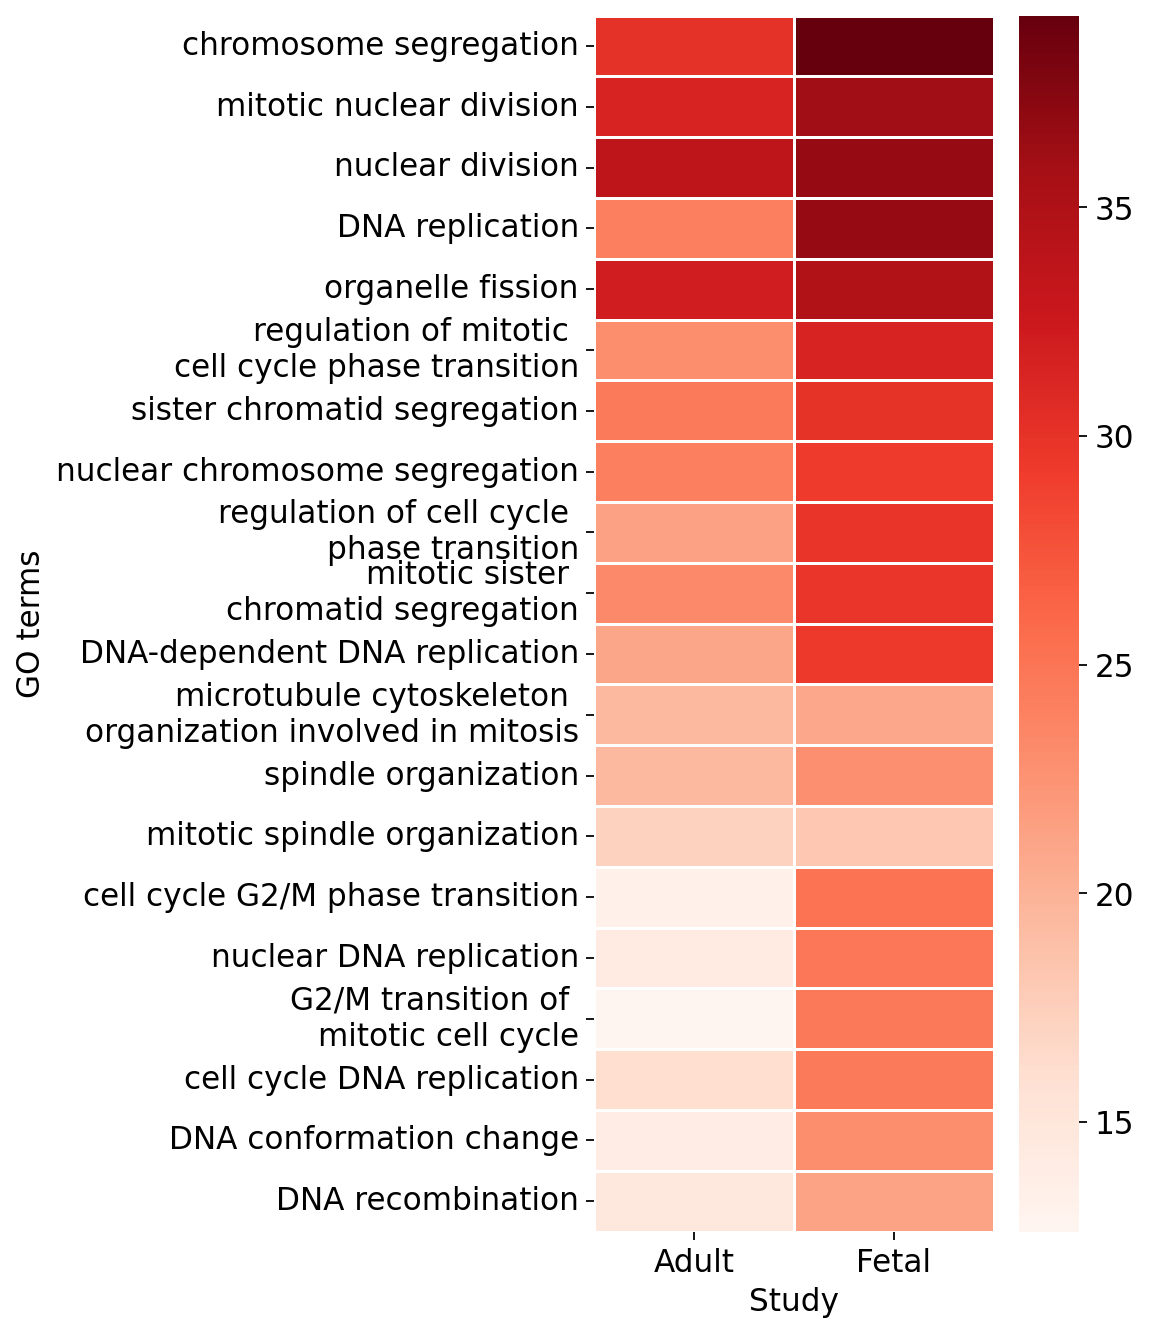

In [73]:
figsize(4,10)
sns.heatmap(df, annot=False, linewidths=.5,cmap='Reds')

# Adding labels
plt.xlabel('Study')
plt.ylabel('GO terms')

# Show the plot
plt.show()

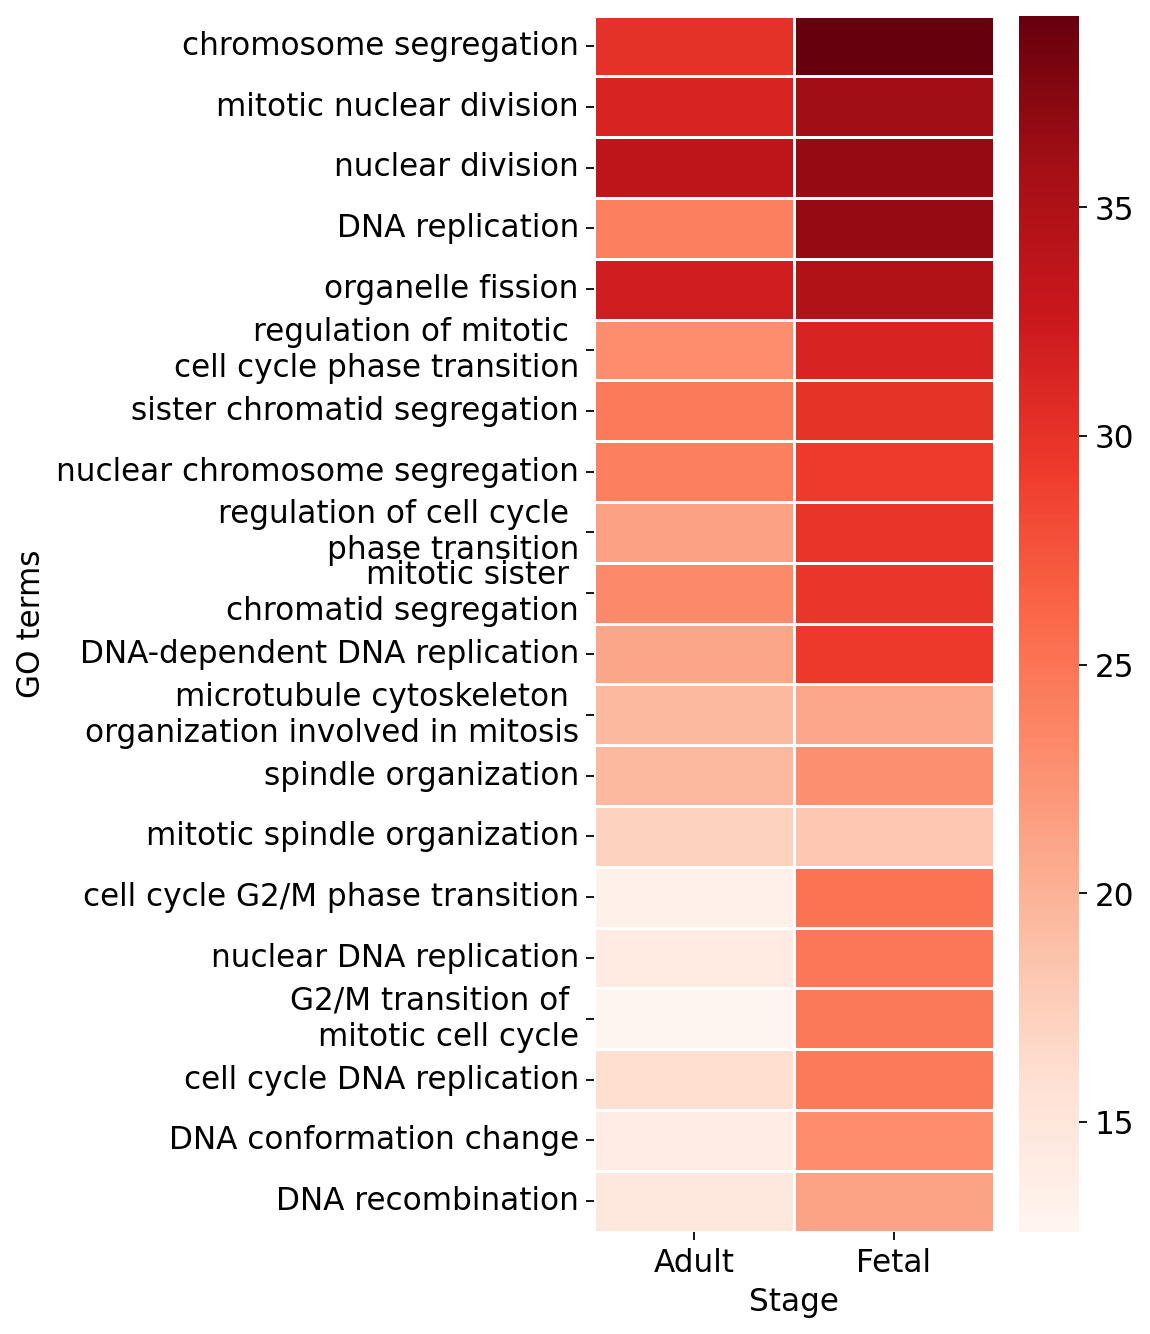

In [75]:
figsize(4,10)
sns.heatmap(df, annot=False, linewidths=.5,cmap='Reds')

# Adding labels
plt.xlabel('Stage')
plt.ylabel('GO terms')

# Show the plot
plt.show()

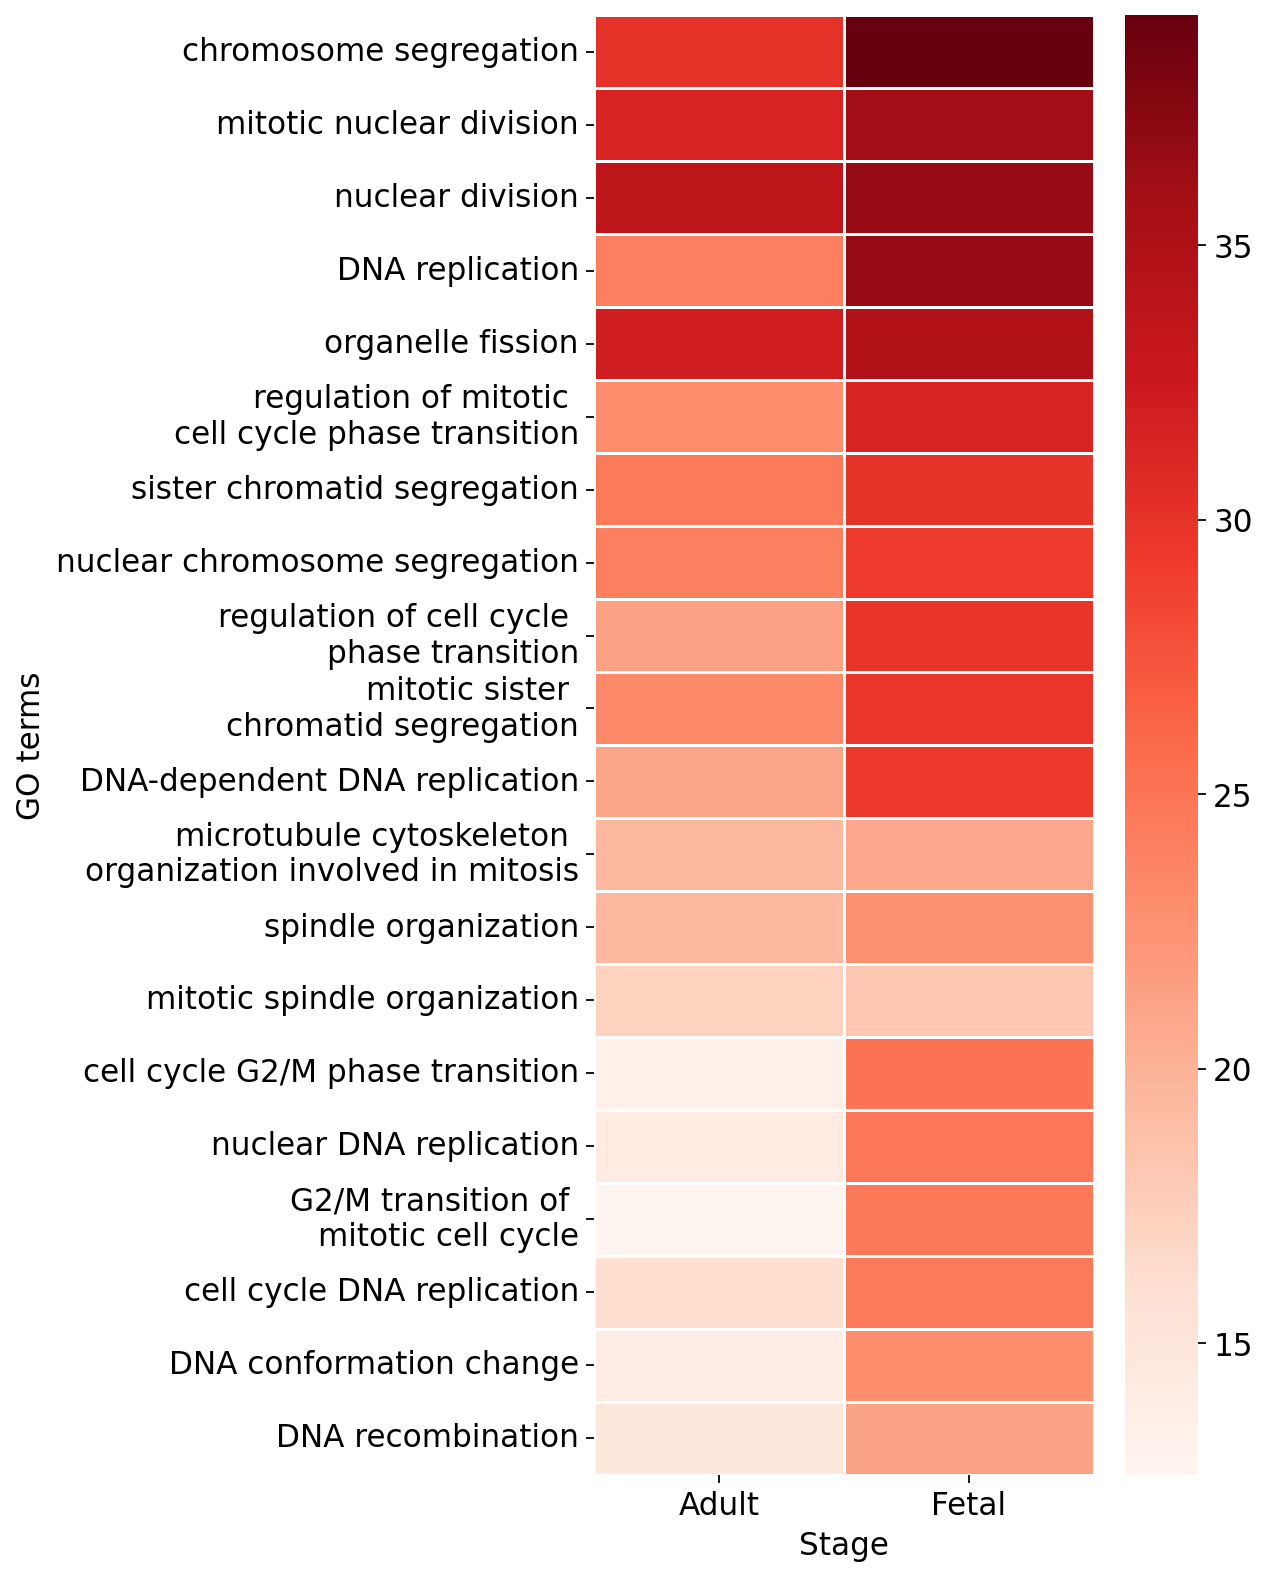

In [74]:
figsize(5,12)
sns.heatmap(df, annot=False, linewidths=.5,cmap='Reds')

# Adding labels
plt.xlabel('Stage')
plt.ylabel('GO terms')

# Show the plot
plt.show()

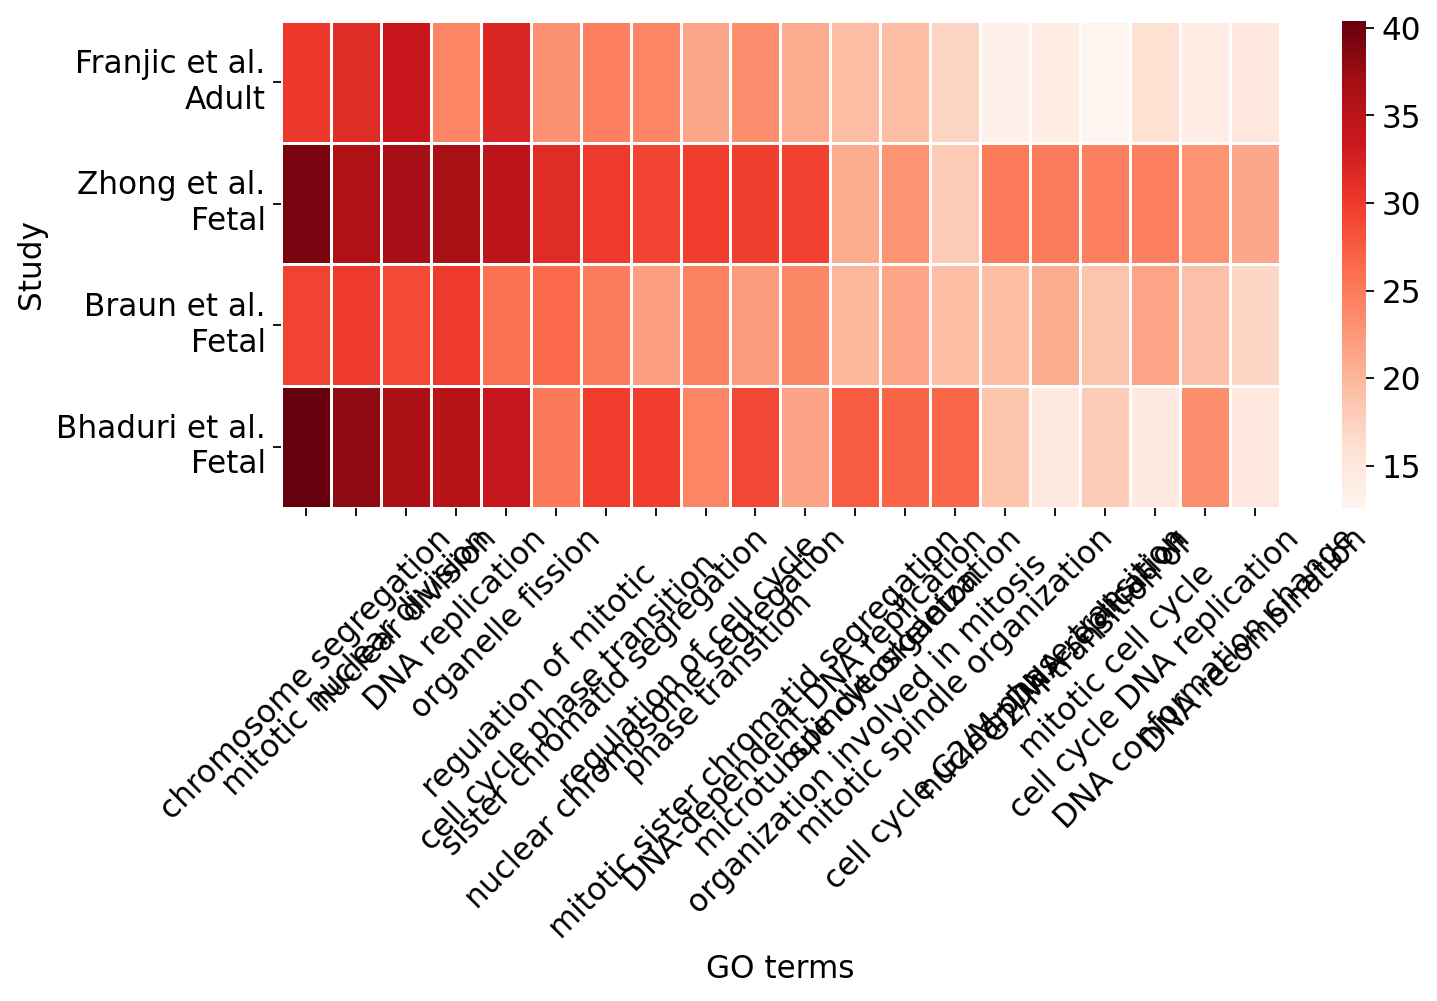

In [285]:
figsize(10,4)
sns.heatmap(df.T, annot=False, linewidths=.5,cmap='Reds')

# Adding labels
plt.ylabel('Study')
plt.xlabel('GO terms')
plt.xticks(rotation=45)
# Show the plot
plt.show()

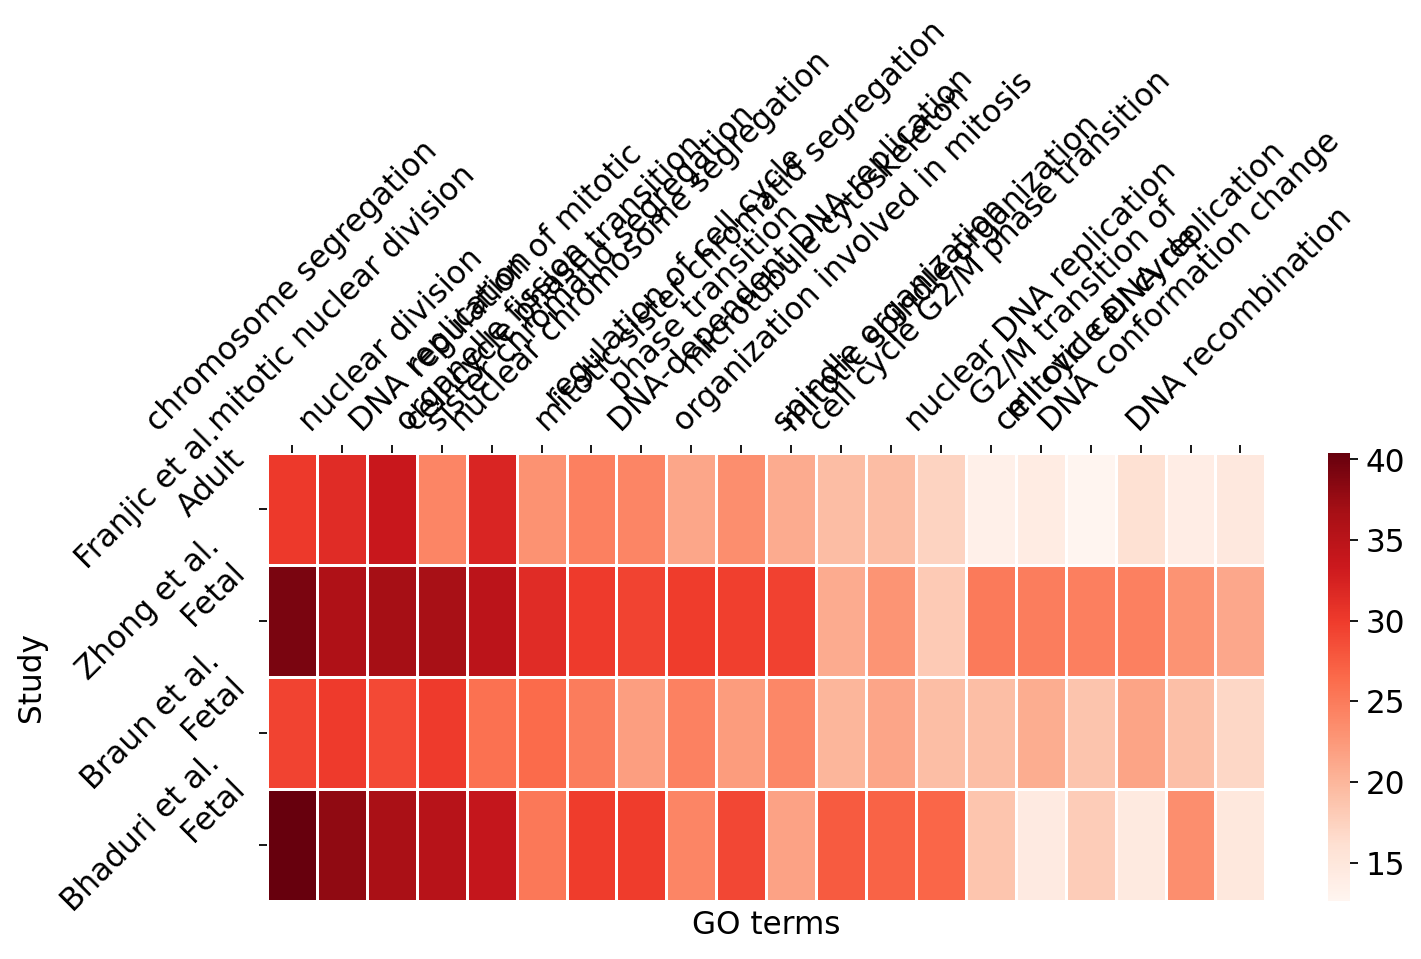

In [286]:
# Create the heatmap
sns.heatmap(df.T, annot=False, linewidths=.5, cmap='Reds')

# Move the x-axis ticks to the top
plt.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False,rotation=45)

# Rotate the x-axis labels
#plt.xticks(rotation=45)

# Adding labels
plt.ylabel('Study')
plt.xlabel('GO terms')

# To ensure the top x-tick labels are visible and not cut off by the plot window
plt.subplots_adjust(top=0.85)

# Show the plot
plt.show()

# Selected GO

In [8]:
go1=pd.read_csv('data/hipngs/Choose_BP_Ex_fig2g.csv',index_col=0)

In [9]:
go1['logq']=-np.log(go1.qvalue)

In [10]:
df=go1[['Description','Celltype','logq']].pivot(index='Description', columns='Celltype', values='logq')

In [11]:
df=df.sort_values(by='Zhong2020',ascending=False)

In [12]:
df.columns=['Adult', 'Fetal']

In [13]:
df.index=['chromosome segregation', 'nuclear division', 'DNA replication',
       'organelle fission', 'cell cycle G2/M phase transition',
       'cell cycle DNA replication', 'spindle organization',
       'microtubule cytoskeleton organization \ninvolved in mitosis',
       'cell cycle checkpoint', 'cell cycle G1/S phase transition',
       'double-strand break repair',
       'metaphase/anaphase transition \nof mitotic cell cycle',
       'kinetochore organization', 'centrosome cycle', 'chromatin remodeling',
       'chromatin assembly', 'DNA synthesis involved in DNA repair',
       'mitotic chromosome condensation',
       'neural precursor cell proliferation', 'stem cell proliferation']

In [15]:
import seaborn as sns

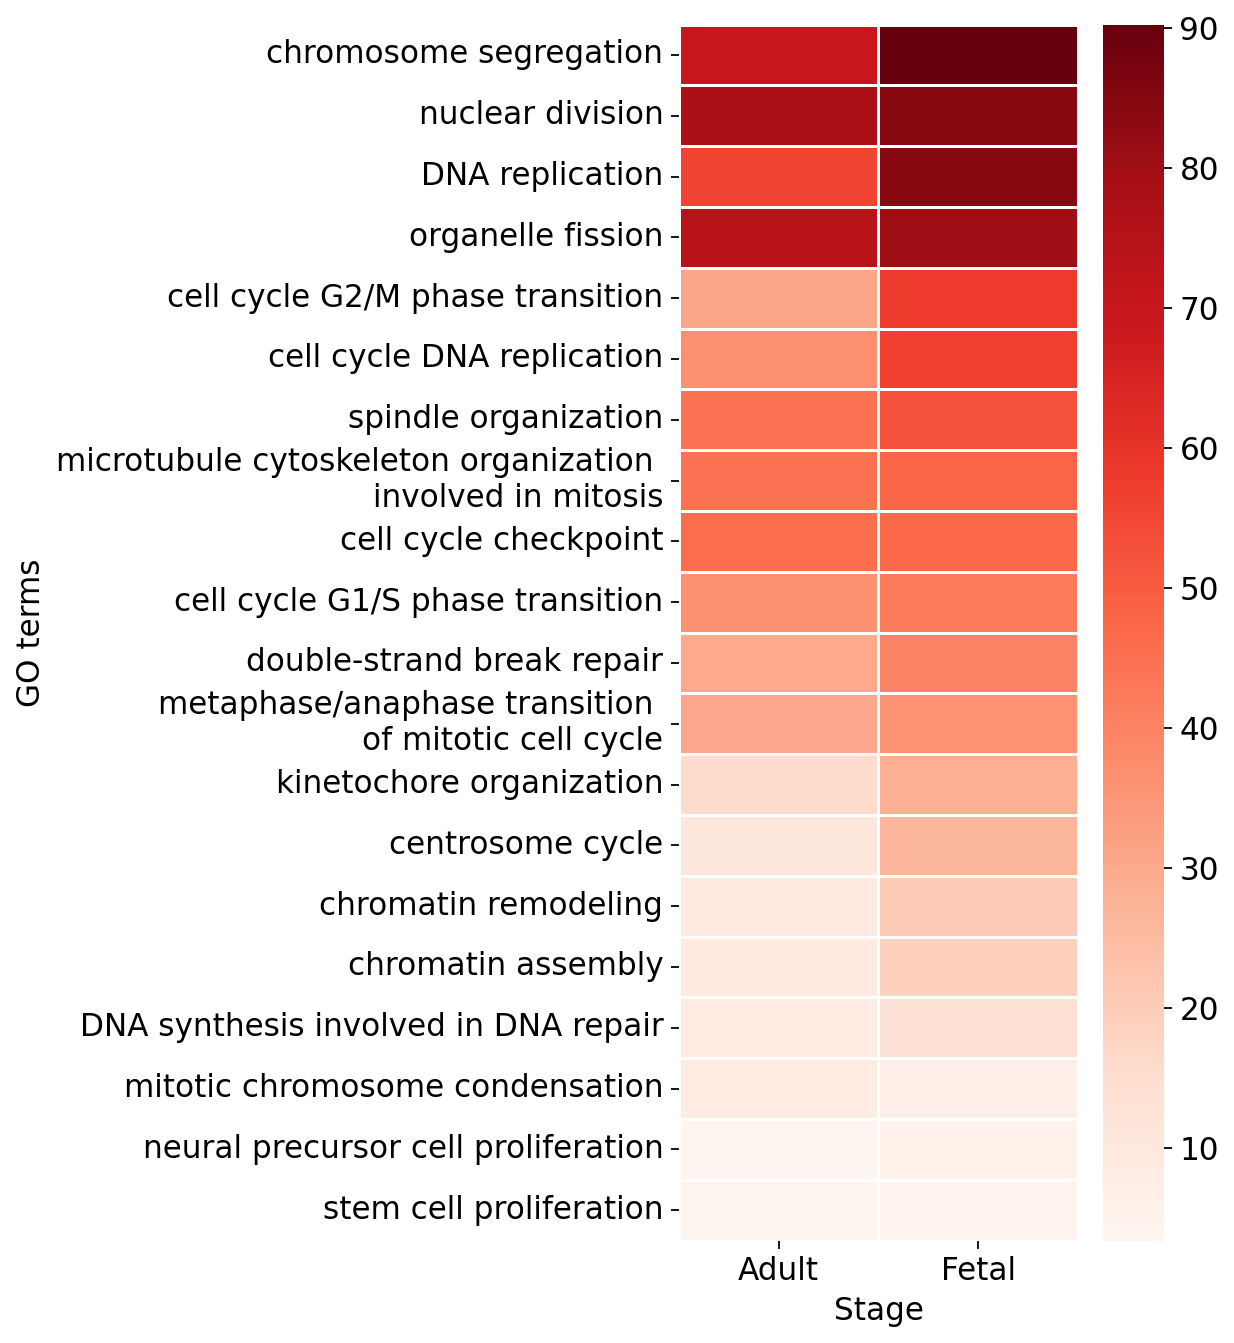

In [16]:
figsize(4,10)
sns.heatmap(df, annot=False, linewidths=.5,cmap='Reds')

# Adding labels
plt.xlabel('Stage')
plt.ylabel('GO terms')

# Show the plot
plt.savefig('figures/go_terms.pdf',dpi=300, bbox_inches='tight',transparent=True)

# END

In [ ]:
ad_raw=ad.copy()

In [ ]:
ad=ad_raw[ad_raw.obs.group=='Franjic2021']
ad=ad[ad.obs.louvain2.isin(['Neural Progenitor cells','Neuroblasts','Immature neurons','Mature neurons'])]

In [ ]:
ad

View of AnnData object with n_obs × n_vars = 35794 × 10384
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'samplename', 'region', 'cluster', 'batch', 'sampleID', 'cellType', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier', 'mt_outlier', 'doublet_score', 'predicted_doublet', 'n_genes', 'group', 'orig_names', 'barcode', 'subregion', 'donor_age', 'cell_ID', 'species', 'reference', 'organ', 'seq_tech', 'sample_type', 'project_code', 'seq_method', 'treatment', 'donor_ID', 'original_name', 'original_name2', 'donor_gender', 'ethnicity', 'sample_ID', 'donor_status', 'sample_status', 'if_patient', 'sample', 'Age', 'CellClass', 'CellCycleFraction', 'CellID', 'Chemistry', 'Clusters', 'Donor', 'DoubletFlag', 'DoubletScore', 'DropletClass', 'MitoFraction', 'NGenes', 'PrevClusters', 'Region', 'SampleID', 'Sex', 'Subdivision', 'Subregion', 'Tissue', 'TopLeve

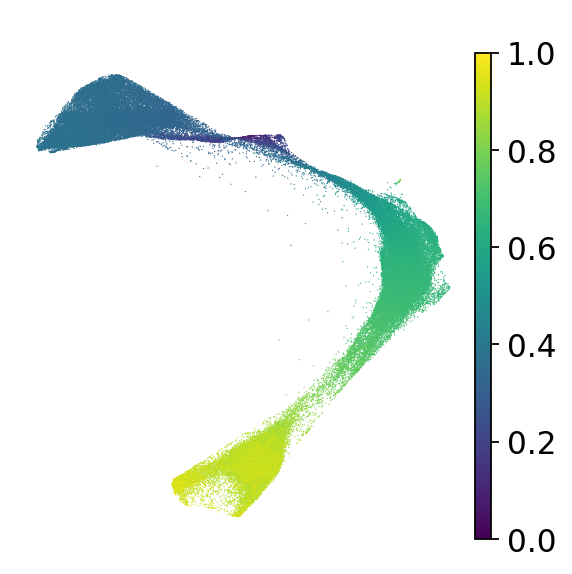

In [ ]:
figsize(4,4)
sc.pl.draw_graph(ad, color=['dpt_pseudotime'], frameon=False,ncols=1,title=' ')

In [ ]:
df = ad[ad.obs.group=='Franjic2021'].obs.groupby(["state", "predict2"]).size().unstack(fill_value=0)

In [ ]:
df

predict2,Astro-adult,Astro-juv,GC-adult,GC-juv,Immature-GC,Neuroblast,RGL,RGL_young,nIPC,nIPC-perin
state,,,,,,,,,,
S0,4826,1105,18,3,0,4,37,1685,0,395
S1,699,42,15,9,1,2,553,4509,0,377
S2,2016,124,774,28,543,579,1262,4816,4,1628
S3,0,0,0,0,0,0,0,0,8,6
S4,0,0,16,0,19,59,2,4,2,1
S5,0,0,118,18,46,18,3,2,0,1
S6,0,0,27,21,3,0,0,0,0,1
S7,0,0,6721,13861,411,0,4,0,0,0
S8,0,0,288,2095,107,0,10,0,0,0


In [ ]:
df=df[['S3', 'S4', 'S5', 'S6'],:]

In [ ]:
conf_mat = df / df.sum(axis=1).values[:, np.newaxis]

Text(0, 0.5, 'Observed')

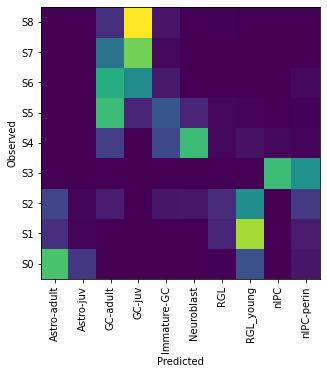

In [ ]:
plt.figure(figsize=(5, 5))
_ = plt.pcolor(conf_mat)
_ = plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, rotation=90)
_ = plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xlabel("Predicted")
plt.ylabel("Observed")

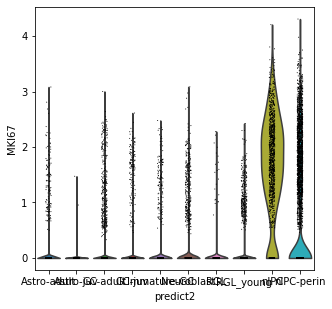

In [ ]:
sc.pl.violin(ad, ['MKI67'], groupby='predict2')

In [ ]:
'MSI1' in ad.var.index

True

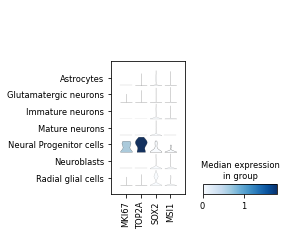

In [ ]:
sc.pl.stacked_violin(ad[ad.obs.group=='Franjic2021'], ['MKI67','TOP2A','SOX2','MSI1'], groupby='louvain2')#,swap_axes=True)

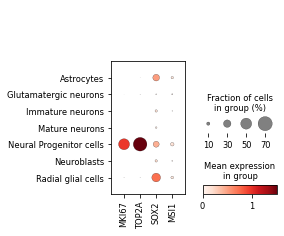

In [ ]:
sc.pl.dotplot(ad[ad.obs.group=='Franjic2021'], ['MKI67','TOP2A','SOX2','MSI1'], groupby='louvain2')#,swap_axes=True)